<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 155.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 160.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 165.9 MB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [22]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [25]:
#Count the number of duplicate rows in the dataset
print('There are', df.duplicated().sum(), 'duplicate rows.')

#Display the first few duplicate rows to understand their structure
first_few_duplicates = df[df.duplicated()].head(20)
print("First few duplicate rows:")
print(first_few_duplicates)

There are 0 duplicate rows.
First few duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmi

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [26]:
#Find out how many rows are missing in the column 'CodingActivities'
print("There are", df['CodingActivities'].isnull().sum(), "missing values in the column 'CodingActivities'")

There are 10971 missing values in the column 'CodingActivities'


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [27]:
#Counting frequency for every unique value
print('\nThere are', df['CodingActivities'].nunique(), 'unique CodingActivities values in the survey:')
print(df['CodingActivities'].value_counts())

#Identify the most frequent (majority) value in the CodingActivities column
print('\nThe most frequent value in the CodingActivities column is:')
df['CodingActivities'].value_counts().idxmax()


There are 118 unique CodingActivities values in the survey:
CodingActivities
Hobby                                                                                                                                                                              9993
I don’t code outside of work                                                                                                                                                       6508
Hobby;Professional development or self-paced learning from online courses                                                                                                          6203
Hobby;Contribute to open-source projects                                                                                                                                           3732
Professional development or self-paced learning from online courses                                                                                                                3120
  

'Hobby'

In [28]:
#Impute missing values in CodingActivities with the majority value
import numpy as np
df['CodingActivities'].replace(np.nan, "Hobby", inplace=True)

/tmp/ipykernel_1007/2681885095.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CodingActivities'].replace(np.nan, "Hobby", inplace=True)


In [29]:
#check for any compensation-related columns and describe their distribution
print('There are', df['CodingActivities'].nunique(), 'unique CodingActivities in the survey:')
print(df['CodingActivities'].value_counts())

There are 118 unique CodingActivities in the survey:
CodingActivities
Hobby                                                                                                                                                                              20964
I don’t code outside of work                                                                                                                                                        6508
Hobby;Professional development or self-paced learning from online courses                                                                                                           6203
Hobby;Contribute to open-source projects                                                                                                                                            3732
Professional development or self-paced learning from online courses                                                                                                                 3120
     

In [30]:
missing_data_new = df.isnull()
print('\nValue counts for missing data in CodingActivities column:\n')
print( missing_data_new['CodingActivities'].value_counts())


Value counts for missing data in CodingActivities column:

CodingActivities
False    65437
Name: count, dtype: int64


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [31]:
#check missing data for ConvertedCompYearly
missing_data = df.isnull()
print('\nValue counts for missing data in ConvertedCompYearly column:\n')
print( missing_data['ConvertedCompYearly'].value_counts())


Value counts for missing data in ConvertedCompYearly column:

ConvertedCompYearly
True     42002
False    23435
Name: count, dtype: int64


In [32]:
#check frequency of unique value of ConvertedCompYearly column
print('\nThere are', df['ConvertedCompYearly'].nunique(), 'unique Converted Compensation Yearly values in the survey:')
print(df['ConvertedCompYearly'].value_counts())


There are 6113 unique Converted Compensation Yearly values in the survey:
ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
9711.0        1
950000.0      1
51448.0       1
447569.0      1
4738.0        1
Name: count, Length: 6113, dtype: int64


In [33]:
#calculate the mean value for the "ConvertedCompYearly" column
avg_convcompyearly = df["ConvertedCompYearly"].astype("float").mean(axis=0)
print("Average of ConvertedCompYearly:", avg_convcompyearly)

#replace the missing 'ConvertedCompYearly' values by the mean value
df["ConvertedCompYearly"].replace(np.nan, avg_convcompyearly, inplace=True)

Average of ConvertedCompYearly: 86155.28726264134


/tmp/ipykernel_1007/1226031951.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ConvertedCompYearly"].replace(np.nan, avg_convcompyearly, inplace=True)


In [34]:
#check after replacement
missing_data = df.isnull()
print('\nValue counts for missing data in ConvertedCompYearly column:\n')
print( missing_data['ConvertedCompYearly'].value_counts())


Value counts for missing data in ConvertedCompYearly column:

ConvertedCompYearly
False    65437
Name: count, dtype: int64


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [37]:
#Min-Max Normalization
#initialize the MinMaxScaler
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler

#reshape the column for fitting the scaler (MinMaxScaler expects a 2D array)
scaler = MinMaxScaler()
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])
df['ConvertedCompYearly_MinMax'].head(10)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 120.4 MB/s eta 0:00:00a 0:00:01


0    0.0053
1    0.0053
2    0.0053
3    0.0053
4    0.0053
5    0.0053
6    0.0053
7    0.0053
8    0.0053
9    0.0053
Name: ConvertedCompYearly_MinMax, dtype: float64

In [38]:
df['ConvertedCompYearly_MinMax'].head(20)

0     0.0053
1     0.0053
2     0.0053
3     0.0053
4     0.0053
5     0.0053
6     0.0053
7     0.0053
8     0.0053
9     0.0053
10    0.0053
11    0.0053
12    0.0053
13    0.0053
14    0.0053
15    0.0053
16    0.0053
17    0.0053
18    0.0053
19    0.0053
Name: ConvertedCompYearly_MinMax, dtype: float64

##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [41]:
#initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
z_score_scaler = StandardScaler()

#reshape the column for fitting the scaler (StandardScaler expects a 2D array)
df['ConvertedCompYearly_Zscore'] = z_score_scaler.fit_transform(df[['ConvertedCompYearly']])
df['ConvertedCompYearly_Zscore'].head(20)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: ConvertedCompYearly_Zscore, dtype: float64

### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


In [42]:
!pip install matplotlib
import matplotlib.pylab as plt

[1.00000000e+00 5.41886833e+06 1.08377357e+07 1.62566030e+07]


Text(0.5, 1.0, 'Converted Compensation Yearly Bins')

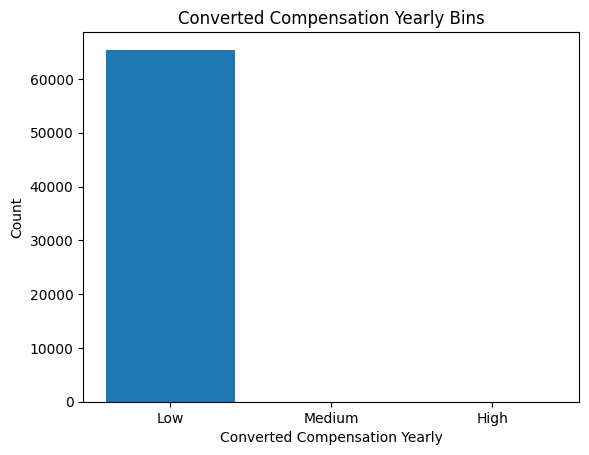

In [47]:
#Visualize the distribution of ConvertedCompYearly

#set bin
bins_ori = np.linspace(min(df['ConvertedCompYearly']), max(df['ConvertedCompYearly']), 4)
print(bins_ori)

#set group name
group_names_ori = ['Low', 'Medium', 'High']

#apply the function "cut" to determine what each value of df['ConvertedCompYearly'] belongs to
df['ConvertedCompYearly-binned'] = pd.cut(df['ConvertedCompYearly'], bins_ori, labels=group_names_ori, include_lowest=True )

#see the number of each bin
df["ConvertedCompYearly-binned"].value_counts()

#plot the distribution of each bin
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names_ori, df["ConvertedCompYearly-binned"].value_counts())

plt.pyplot.xlabel("Converted Compensation Yearly")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Converted Compensation Yearly Bins")

In [48]:
print('\nThere are', df['ConvertedCompYearly-binned'].nunique(), 'unique ConvertedCompYearly-binned values in the survey:')
print(df['ConvertedCompYearly-binned'].value_counts())


There are 3 unique ConvertedCompYearly-binned values in the survey:
ConvertedCompYearly-binned
Low       65433
Medium        2
High          2
Name: count, dtype: int64


[0.         0.33333333 0.66666667 1.        ]


Text(0.5, 1.0, 'Normalized Converted Compensation Yearly Bins')

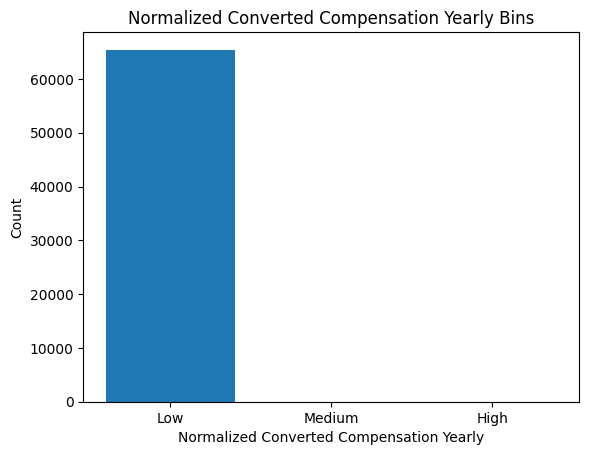

In [50]:
#Visualize the distribution of ConvertedCompYearly_MinMax
#set bin
bins_minmax = np.linspace(min(df['ConvertedCompYearly_MinMax']), max(df['ConvertedCompYearly_MinMax']), 4)
print(bins_minmax)

#set group name
group_names_minmax = ['Low', 'Medium', 'High']

#apply the function "cut" to determine what each value of df['ConvertedCompYearly_MinMax'] belongs to
df['ConvertedCompYearly_MinMax'] = pd.cut(df['ConvertedCompYearly_MinMax'], bins_minmax, labels=group_names_minmax, include_lowest=True )

#see the number of each bin
df["ConvertedCompYearly_MinMax"].value_counts()

#plot the distribution of each bin
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names_minmax, df["ConvertedCompYearly_MinMax"].value_counts())

plt.pyplot.xlabel("Normalized Converted Compensation Yearly")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Normalized Converted Compensation Yearly Bins")

In [53]:
print('\nThere are', df['ConvertedCompYearly_MinMax'].nunique(), 'unique ConvertedCompYearly_MinMax values in the survey:')
print(df['ConvertedCompYearly_MinMax'].value_counts())


There are 3 unique ConvertedCompYearly_MinMax values in the survey:
ConvertedCompYearly_MinMax
Low       65433
Medium        2
High          2
Name: count, dtype: int64


[ -0.77088314  47.71554251  96.20196817 144.68839382]


Text(0.5, 1.0, 'Converted Compensation Yearly Z-score Bins')

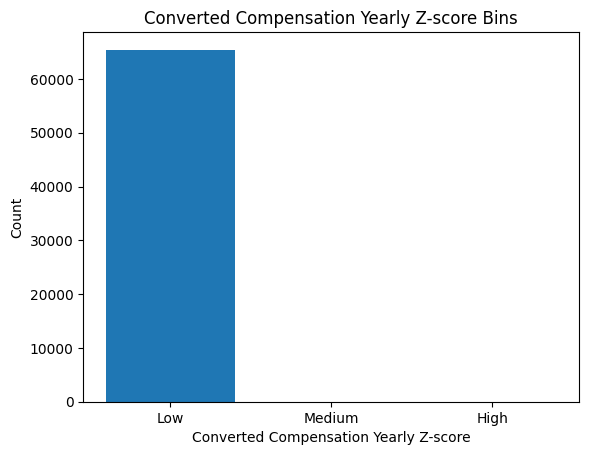

In [52]:
#Visualize the distribution of ConvertedCompYearly_Zscore
#set bin
bins_zscore = np.linspace(min(df['ConvertedCompYearly_Zscore']), max(df['ConvertedCompYearly_Zscore']), 4)
print(bins_zscore)

#set group name
group_names_zscore = ['Low', 'Medium', 'High']

#apply the function "cut" to determine what each value of df['ConvertedCompYearly_Zscore'] belongs to
df['ConvertedCompYearly_Zscore'] = pd.cut(df['ConvertedCompYearly_Zscore'], bins_zscore, labels=group_names_zscore, include_lowest=True )

#see the number of each bin
df["ConvertedCompYearly_Zscore"].value_counts()

#plot the distribution of each bin
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names_zscore, df["ConvertedCompYearly_Zscore"].value_counts())

plt.pyplot.xlabel("Converted Compensation Yearly Z-score")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Converted Compensation Yearly Z-score Bins")

In [54]:
print('\nThere are', df['ConvertedCompYearly_Zscore'].nunique(), 'unique ConvertedCompYearly_Zscore values in the survey:')
print(df['ConvertedCompYearly_Zscore'].value_counts())


There are 3 unique ConvertedCompYearly_Zscore values in the survey:
ConvertedCompYearly_Zscore
Low       65433
Medium        2
High          2
Name: count, dtype: int64


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
